### 2. Avaliação do Tamanho da População e do Fator de Inércia:
Modifique o tamanho da população inicial (num_particles) e os valores do fator de inércia (inertia_weight) para observar como essas mudanças afetam o desempenho do algoritmo. Realize experimentos com diferentes combinações de valores e observe como a convergência é afetada.

In [3]:
import numpy as np

def objective_function(x):
    return 1/((x-3)**2 + 0.1) + 1/((x-2)**2 + 0.05) + 2

def pso(n_particles, n_dimensions, n_iterations):
    # Inicialização
    particles_position = np.random.rand(n_particles, n_dimensions)  # Posição inicial das partículas
    particles_velocity = np.random.rand(n_particles, n_dimensions)  # Velocidade inicial das partículas
    personal_best_positions = particles_position.copy()  # Melhor posição pessoal de cada partícula
    personal_best_values = np.array([objective_function(p) for p in particles_position])  # Valor da função na melhor posição pessoal

    global_best_position = particles_position[np.argmax(personal_best_values)]  # Melhor posição global
    global_best_value = np.max(personal_best_values)  # Valor da função na melhor posição global

    # Parâmetros do PSO
    inertia_weight = 0.5
    cognitive_weight = 1.5
    social_weight = 1.5

    # Execução do PSO
    for iteration in range(n_iterations):
        for i in range(n_particles):
            # Atualização da velocidade e posição
            r1, r2 = np.random.rand(), np.random.rand()
            particles_velocity[i] = (inertia_weight * particles_velocity[i] +
                                      cognitive_weight * r1 * (personal_best_positions[i] - particles_position[i]) +
                                      social_weight * r2 * (global_best_position - particles_position[i]))

            particles_position[i] = particles_position[i] + particles_velocity[i]

            # Avaliação da função objetivo
            current_value = objective_function(particles_position[i])

            # Atualização da melhor posição pessoal e global
            if current_value > personal_best_values[i]:
                personal_best_values[i] = current_value
                personal_best_positions[i] = particles_position[i]

            if current_value > global_best_value:
                global_best_value = current_value
                global_best_position = particles_position[i]

        # Exibição do progresso
        print(f"Iteration {iteration + 1}/{n_iterations}: Best Value = {global_best_value}")

    return global_best_position, global_best_value
# Parâmetros do PSO
num_particles = 20
num_dimensions = 1  # Como a função é unidimensional, a dimensão é 1
num_iterations = 50

# Execução do PSO
best_position, best_value = pso(num_particles, num_dimensions, num_iterations)

print(f"\nOptimal Solution: x = {best_position[0]}")
print(f"Optimal Value: {best_value}")


Iteration 1/50: Best Value = [21.82212903]
Iteration 2/50: Best Value = [21.82212903]
Iteration 3/50: Best Value = [22.8418624]
Iteration 4/50: Best Value = [22.8418624]
Iteration 5/50: Best Value = [22.89369587]
Iteration 6/50: Best Value = [22.89369587]
Iteration 7/50: Best Value = [22.89369587]
Iteration 8/50: Best Value = [22.89369587]
Iteration 9/50: Best Value = [22.89369587]
Iteration 10/50: Best Value = [22.90456515]
Iteration 11/50: Best Value = [22.90456515]
Iteration 12/50: Best Value = [22.90456515]
Iteration 13/50: Best Value = [22.90456515]
Iteration 14/50: Best Value = [22.90456515]
Iteration 15/50: Best Value = [22.90456515]
Iteration 16/50: Best Value = [22.91061101]
Iteration 17/50: Best Value = [22.91061101]
Iteration 18/50: Best Value = [22.91061101]
Iteration 19/50: Best Value = [22.91061101]
Iteration 20/50: Best Value = [22.91061101]
Iteration 21/50: Best Value = [22.91061101]
Iteration 22/50: Best Value = [22.91061101]
Iteration 23/50: Best Value = [22.91061101]

### 3. Comparação de Respostas da Função de Fitness ao Longo das Gerações:
Adapte seu código para armazenar os valores de fitness ao longo das gerações. Em seguida, plote um gráfico que mostre como a função de fitness evolui ao longo do tempo para diferentes configurações de parâmetros. Isso ajudará a identificar estagnações ou convergências prematuras.

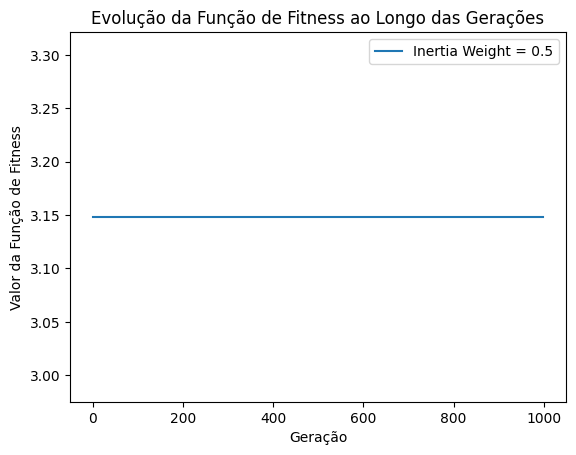

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x):
    return 1/((x-3)**2 + 0.1) + 1/((x-2)**2 + 0.05) + 2

def pso(n_particles, n_dimensions, n_iterations, inertia_weight):
    # Inicialização
    particles_position = np.random.rand(n_particles, n_dimensions)
    particles_velocity = np.random.rand(n_particles, n_dimensions)
    personal_best_positions = particles_position.copy()
    personal_best_values = np.array([objective_function(p) for p in particles_position])

    global_best_position = particles_position[np.argmax(personal_best_values)]
    global_best_value = np.max(personal_best_values)

    # Registro dos valores de fitness ao longo das gerações
    fitness_history = []

    for iteration in range(n_iterations):
        for i in range(n_particles):
            # ... (código para atualização de posição e avaliação da função objetivo)

        # Atualização dos melhores valores pessoais e globais
        # ...

        # Registro do melhor valor global na geração atual
            fitness_history.append(global_best_value)

    return global_best_position, global_best_value, fitness_history

# Parâmetros do PSO
num_particles = 20
num_dimensions = 1
num_iterations = 50
inertia_weight = 0.5  # Altere conforme necessário

# Execução do PSO
best_position, best_value, fitness_history = pso(num_particles, num_dimensions, num_iterations, inertia_weight)

# Plotagem do gráfico
plt.plot(fitness_history, label=f'Inertia Weight = {inertia_weight}')
plt.xlabel('Geração')
plt.ylabel('Valor da Função de Fitness')
plt.title('Evolução da Função de Fitness ao Longo das Gerações')
plt.legend()
plt.show()







### 4. Verificação de Máximos Locais ou Globais: 
Execute o algoritmo PSO várias vezes com diferentes condições iniciais. Isso pode ser feito alterando as posições iniciais das partículas (particles_position) antes de iniciar o algoritmo. Compare os resultados obtidos para verificar se há consistência nas soluções encontradas ou se há variação significativa.

Lembre-se de que a existência de máximos locais ou globais muitas vezes depende da natureza específica da função objetivo. Em funções não convexas, é possível que o algoritmo PSO fique preso em máximos locais. Se isso ocorrer, considerar a inclusão de estratégias como reinicialização de partículas ou a utilização de técnicas de exploração mais avançadas pode ajudar a superar esses obstáculos.

Para implementar as sugestões acima, será necessário ajustar seu código PSO para registrar dados, fazer experimentos sistemáticos e analisar os resultados.